William Lee / BMI-2005 / Homework 2

In [1]:
import os
path = "/Users/williamlee/Desktop/BMI2005_Algorithms_2020"
os.chdir(path)

In [2]:
# 1a)
import numpy as np

xyz_0200L = "lj-0200-liquid.xyz"

def naive_lj(r,s=1,e=1):
  return 4*e*(((s/r)**12) - ((s/r)**6))

def xyz_reader(xyz_file):

    position = []
    with open(xyz_file, "r") as xyz:
        l_cnt = 0
        for line in xyz:
            l_cnt += 1
            if l_cnt <=2:
                continue
            else:
                xyz_pos = line.split()
                xyz_pos.pop(0)
                position.append(xyz_pos)
    
    pos_array = np.array(position, dtype="float32")
    return pos_array

def calc_distance(positions):
    len_array = len(positions)
    b_len_xyz = np.array([6.4365959, 6.4365959, 6.4365959])
    i = 0
    dist_array = []
        
    for a in positions:
        i += 1
        for index in range(i,len_array):
            b = positions[index,:]
            
            square_distance = 0
            for dim in range(0,3):
                
                distance_in_dim = a[dim] - b[dim]
                distance_in_dim -= b_len_xyz[dim]*round(distance_in_dim/b_len_xyz[dim])
                square_distance += distance_in_dim**2
                                
            distance = np.sqrt(square_distance)
            dist_array.append(distance)
                
    return dist_array

def calc_sys_energy(xyz_file, cutoff):
    
    positions = xyz_reader(xyz_file)
    dist_array = calc_distance(positions)
    
    system_energy = 0
    
    for distance in dist_array:
        if distance <= cutoff:
            system_energy += naive_lj(distance,1,1)    
                
    return system_energy

In [3]:
# 1b)
print("system potential energy:",calc_sys_energy(xyz_0200L, 2))

system potential energy: -862.1552495456847


In [4]:
# 2a)
def verlet(xyz_file, cutoff, sheath):
    
    cutoff_plus_sheath = cutoff + sheath
    
    positions = xyz_reader(xyz_file)
    len_array = len(positions)
    b_len_xyz = np.array([6.4365959, 6.4365959, 6.4365959])
    i = 0
    
    lookup = np.zeros(len_array)
    value = []
    
    for i in range(0, len_array):
        pair_counter = 0
        for j in range(i+1, len_array):
            
            square_distance = 0
            for dim in range(0,3):
                
                distance_in_dim = positions[i][dim] - positions[j][dim]
                distance_in_dim -= b_len_xyz[dim]*round(distance_in_dim/b_len_xyz[dim])
                square_distance += distance_in_dim**2
                                    
            distance = np.sqrt(square_distance)
                
            if (distance < cutoff_plus_sheath):
                value.append(j)
                pair_counter += 1
                
        lookup[i] = pair_counter
    value = np.array(value)
    
    return value,lookup

cutoff_2a =  2.0
sheath_2a = 0.3

verlet_soln = verlet(xyz_0200L, cutoff_2a, sheath_2a)
print(verlet_soln)

(array([  4,  10,  14, ..., 196, 199, 198]), array([42., 39., 43., 45., 39., 32., 39., 40., 30., 34., 34., 34., 37.,
       36., 37., 37., 36., 36., 34., 37., 35., 32., 32., 35., 32., 36.,
       34., 29., 30., 37., 35., 29., 31., 30., 34., 25., 27., 35., 33.,
       28., 31., 26., 29., 29., 25., 31., 28., 29., 22., 29., 34., 28.,
       30., 23., 27., 26., 30., 24., 27., 31., 28., 34., 22., 21., 24.,
       25., 22., 30., 19., 23., 27., 24., 32., 27., 20., 20., 25., 28.,
       17., 28., 19., 29., 29., 17., 23., 26., 24., 24., 19., 25., 25.,
       19., 23., 20., 19., 26., 18., 21., 12., 25., 20., 20., 26., 24.,
       19., 24., 26., 25., 14., 11., 21., 18., 17., 12., 16., 16., 19.,
       13., 13., 17., 12., 19., 11.,  9., 10., 15., 12., 19., 15., 13.,
       12., 10., 11.,  8.,  9., 11.,  8., 15., 11., 15., 12., 13., 10.,
       14.,  9.,  9., 15.,  9., 13.,  8., 16.,  7.,  9., 12., 14.,  9.,
        8.,  8.,  6.,  4., 14.,  9.,  3.,  1.,  7.,  2.,  5.,  8.,  6.,
        4., 11.,  2

In [5]:
# 2b)
def calc_verlet(xyz_file, value, lookup, cutoff):
    
    positions = xyz_reader(xyz_file)
    
    lenLook = len(lookup)
    b_len_xyz = np.array([6.4365959, 6.4365959, 6.4365959])
    system_energy = 0
    i = 0
    
    for a in range(lenLook):
        poten = value[int(i):int(lookup[a] + i)]
        lenPoten = len(poten)
        for b in range(lenPoten):
            x = poten[b]
            
            square_distance = 0
            for dim in range(0,3):
                
                distance_in_dim = positions[a][dim] - positions[x][dim]
                distance_in_dim -= b_len_xyz[dim]*round(distance_in_dim/b_len_xyz[dim])
                square_distance += distance_in_dim**2
                                    
            distance = np.sqrt(square_distance)
                
            if (distance < cutoff):
                system_energy += naive_lj(distance,1,1)
                    
        i += lookup[a]
    return system_energy
    
value_2b = verlet_soln[0]    
lookup_2b = verlet_soln[1]  

print(calc_verlet(xyz_0200L, value_2b, lookup_2b, cutoff_2a))

"""
The complexity of this function is now O(n) because distance calculations
between every possible pair of atoms no longer have to be made. Now, the 
only distance calculations that are made are between atoms whose distance
will fall within the cutoff. The lookup process has a complexity of O(n).
"""

-862.1552495456847


'\nThe complexity of this function is now O(n) because distance calculations\nbetween every possible pair of atoms no longer have to be made. Now, the \nonly distance calculations that are made are between atoms whose distance\nwill fall within the cutoff. The lookup process has a complexity of O(n).\n'

In [ ]:
# 3a) 
"""
The dimensions of each cell (i.e., x,y, & z length) must be of greater
magnitude than the cutoff (in this case, 2). If not, atoms in neighboring
cells may overlap.
"""

In [7]:
# 3b)
# class "Node" has functions to retrieve index, set index, and point to next node. 
class Node:
    def __init__(self,initdata):
        self.data = initdata
        self.next = None

    def get_index(self):
        return self.data
    
    def set_index(self,newIdx):
        self.data = newIdx

    def next_node(self):
        return self.next


class LinkedList:
    def __init__(self):
        self.head = None
        
    def isEmpty(self):
        return self.head == None

    def add(self,item):
        newNode = Node(item)
        newNode.next = self.head
        self.head = newNode

n = 3

linList_array = []
for _ in range(n):
    array1 = [] 
    for _ in range(n):
        array2 = [] 
        for _ in range(n):
            linList = LinkedList()
            
            array2.append(linList)
        array1.append(array2)
        
    linList_array.append(array1)
linList_array = np.array(linList_array)

cell_array = []
pos_idx = {}

In [8]:
# 3c.i)
for x_pos in range(n):
    for y_pos in range(n):
        for z_pos in range(n):
            
            position = str((x_pos,y_pos,z_pos))
    
            cell_array.append(position)
            pos_idx[position] = (x_pos,y_pos,z_pos)
            
mv_poten = []
move_op_2d = [-1,0,1]

for x_move in move_op_2d:
    for y_move in move_op_2d:
        for z_move in move_op_2d:
            
            if [x_move, y_move, z_move] != [0, 0, 0]:
            
                mv_poten.append([x_move, y_move, z_move])

cell_ac = {}
for cell in cell_array:
    ac_array = []
    for mv in mv_poten:
        
        ac = np.add(pos_idx[cell], mv)
        
        for idx in range(3):
            pos = ac[idx]
            if pos == -1:
                ac[idx] = 2
            elif pos == 3:
                ac[idx] = 0
        
        ac_array.append(ac)
        
    cell_ac[cell] = (ac_array)
    
print(cell_ac)

{'(0, 0, 0)': [array([2, 2, 2]), array([2, 2, 0]), array([2, 2, 1]), array([2, 0, 2]), array([2, 0, 0]), array([2, 0, 1]), array([2, 1, 2]), array([2, 1, 0]), array([2, 1, 1]), array([0, 2, 2]), array([0, 2, 0]), array([0, 2, 1]), array([0, 0, 2]), array([0, 0, 1]), array([0, 1, 2]), array([0, 1, 0]), array([0, 1, 1]), array([1, 2, 2]), array([1, 2, 0]), array([1, 2, 1]), array([1, 0, 2]), array([1, 0, 0]), array([1, 0, 1]), array([1, 1, 2]), array([1, 1, 0]), array([1, 1, 1])], '(0, 0, 1)': [array([2, 2, 0]), array([2, 2, 1]), array([2, 2, 2]), array([2, 0, 0]), array([2, 0, 1]), array([2, 0, 2]), array([2, 1, 0]), array([2, 1, 1]), array([2, 1, 2]), array([0, 2, 0]), array([0, 2, 1]), array([0, 2, 2]), array([0, 0, 0]), array([0, 0, 2]), array([0, 1, 0]), array([0, 1, 1]), array([0, 1, 2]), array([1, 2, 0]), array([1, 2, 1]), array([1, 2, 2]), array([1, 0, 0]), array([1, 0, 1]), array([1, 0, 2]), array([1, 1, 0]), array([1, 1, 1]), array([1, 1, 2])], '(0, 0, 2)': [array([2, 2, 1]), a

In [9]:
# 3c.ii)
"""
Please see the function "add", defined under the class "LinkedList".
"""

'\nPlease see the function "add", defined under the class "LinkedList".\n'

In [10]:
# 3c.iii) N/A

In [11]:
# 4)
import numpy as np
A = np.array([
    [1, 3, 10, 2],
    [14, 13, 12, 5],
    [15, 9, 11, 6],
    [16, 17, 13, 18]    
])

def peak_finder(A, c1idx, cFidx):
    
    c = (c1idx + cFidx)//2 # floor division needed here
    temp = 0
    
    for r in range(len(A)):
        if A[r][c] > temp:
            temp = A[r][c]
            
            ptpk_r = r
            ptpk_c = c
            
    if ptpk_c == cFidx:
        return A[ptpk_r][ptpk_c]
    
    elif A[ptpk_r][ptpk_c] < A[ptpk_r][ptpk_c + 1]:
        return peak_finder(A, ptpk_c + 1, cFidx) # recursive call
    
    elif A[ptpk_r][ptpk_c] < A[ptpk_r][ptpk_c - 1]:
        return peak_finder(A, c1idx, ptpk_c - 1) # recursive call 

    else:
        return A[ptpk_r][ptpk_c]

print(peak_finder(A,0,3))

# Complexity: O(n)

17


In [12]:
##########################################################
# THE FOLLOWING CODE IS FROM THE HOMEWORK #2 GOOGLE DOC #

def selection_sort(A):
    for i in range(len(A)):
        min_idx = i
        for j in range(i + 1, len(A)):
            if A[min_idx] > A[j]:
                min_idx = j
        A[i], A[min_idx] = A[min_idx], A[i]
    return A

def insertion_sort(A):
    n = len(A)
    count = 0 
    for i in range(1,n):
        k = i
        while k > 0 and A[k] < A[k-1]:
            A[k], A[k-1] = A[k-1], A[k]
            k = k - 1
            count += 1
    return count, A

def merge (front, back):
    pos_f, pos_b = 0,0
    merged = np.zeros(len(front)+len(back))
    for i in range (len(merged)):
        if pos_f == len(front):
            merged[i] = back[pos_b]
            pos_b += 1
        elif pos_b == len(back):
            merged[i] = front[pos_f]
            pos_f += 1
        elif front[pos_f] < back[pos_b]:
            merged[i] = front[pos_f]
            pos_f += 1
        else:
            merged[i] = back[pos_b]
            pos_b += 1
    return merged

def merge_sort(A):
    n = len(A)
    if n <= 1:
        return A
    mid = int(n/2)
    front = merge_sort(A[0:mid])
    back = merge_sort(A[mid:])
    return merge(front, back)

def partition(A, lo, hi):
    pivotvalue = A[lo]
    i = lo+1    
    j = hi
    done = False
    while not done:
        while i <= j and A[i] <= pivotvalue:
            i = i + 1
        while A[j] >= pivotvalue and j >= i:
            j = j - 1
        if j < i:
            done = True
        else:
            A[i], A[j] = A[j], A[i]
    A[lo], A[j] = A[j], A[lo]
    return j, A

def quick_sort(A, lo, hi):
    if lo < hi:
        splitpoint, A = partition(A, lo, hi)
        A = quick_sort(A, lo, splitpoint - 1)
        A = quick_sort(A, splitpoint + 1, hi)    
    return A

def quick_sort_helper_rand(A):
    np.random.shuffle(A)
    return quick_sort(A, 0, len(A)-1)

def quick_sort_helper_nonrand(A):
    return quick_sort(A, 0, len(A)-1)
##########################################################

In [13]:
import time
import numpy as np
import matplotlib.pyplot as plt

def case1array(x):
    return(np.sort(np.random.randint(0,101,size=x)))

def case2array(x):
    return(sorted(np.random.randint(0,101,size=x),reverse=True))
    
def case3array(x):
    return(np.random.randint(0,101,size=x))
    
def case4array(x):
    return(np.ones(x,dtype=np.int64))

def case5array(x):
    return(np.random.randint(0,3,size=x))

def get_time(A, sort_func):
    begin = time.process_time()
    sort_func(A)
    finish = time.process_time()
    return (finish - begin)

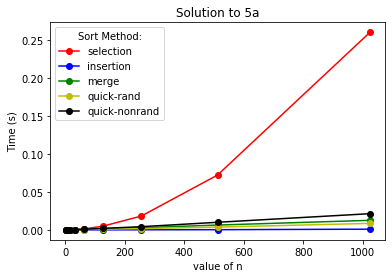

In [14]:
# 5a)
# A is perfectly sorted and contains random integers (0 to 100 inclusive).
"""
Insertion sort wins, which makes sense because it does not have to perform any unecessary steps (e.g., partition).
Ergo, it has a best-case runtime of O(n).
"""

def doubling_test_c1(n, n_max):
    
    select_data = []
    insert_data = []
    merge_data = []
    quick_r_data = []
    quick_nr_data = []
    
    while n <= n_max: 
        select_data.append((n, get_time(case1array(n),selection_sort)))
        insert_data.append((n, get_time(case1array(n),insertion_sort)))
        merge_data.append((n, get_time(case1array(n),merge_sort)))
        quick_r_data.append((n, get_time(case1array(n),quick_sort_helper_rand)))
        quick_nr_data.append((n, get_time(case1array(n),quick_sort_helper_nonrand)))
        n *= 2
        
    select_np = np.array(select_data)
    insert_np = np.array(insert_data)
    merge_np = np.array(merge_data)
    quick_r_np = np.array(quick_r_data)
    quick_nr_np = np.array(quick_nr_data)
    
    return (select_np, insert_np, merge_np, quick_r_np, quick_nr_np)

c1_ret = doubling_test_c1(2, 1024)
select_c1, insert_c1, merge_c1, quick_r_c1, quick_nr_c1 = \
c1_ret[0],c1_ret[1], c1_ret[2], c1_ret[3], c1_ret[4]

plt.figure()
plt.title("Solution to 5a")
plt.xlabel("value of n")
plt.ylabel("Time (s)")

plt.plot(select_c1[:,0], select_c1[:,1], marker='o', color='r')
plt.plot(insert_c1[:,0], insert_c1[:,1], marker='o', color='b')
plt.plot(merge_c1[:,0], merge_c1[:,1], marker='o', color='g')
plt.plot(quick_r_c1[:,0], quick_r_c1[:,1], marker='o', color='y')
plt.plot(quick_nr_c1[:,0], quick_nr_c1[:,1], marker='o', color='k')

plt.legend(["selection","insertion","merge","quick-rand","quick-nonrand"], \
           loc='best', title = "Sort Method:", fancybox=True)

plt.show();

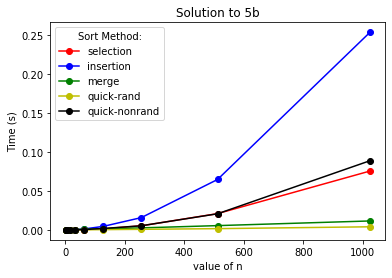

In [15]:
# 5b)
# A is reversely sorted and contains random integers (0 to 100 inclusive)
"""
Quicksort (random) wins, which makes sense because it randomizes the array (initially
reverse sorted) and has (for this array) a best-case runtime of nlog(n).
"""

def doubling_test_c2(n, n_max):
    
    select_data = []
    insert_data = []
    merge_data = []
    quick_r_data = []
    quick_nr_data = []
    
    while n <= n_max: 
        select_data.append((n, get_time(case2array(n),selection_sort)))
        insert_data.append((n, get_time(case2array(n),insertion_sort)))
        merge_data.append((n, get_time(case2array(n),merge_sort)))
        quick_r_data.append((n, get_time(case2array(n),quick_sort_helper_rand)))
        quick_nr_data.append((n, get_time(case2array(n),quick_sort_helper_nonrand)))
        n *= 2
        
    select_np = np.array(select_data)
    insert_np = np.array(insert_data)
    merge_np = np.array(merge_data)
    quick_r_np = np.array(quick_r_data)
    quick_nr_np = np.array(quick_nr_data)
    
    return (select_np, insert_np, merge_np, quick_r_np, quick_nr_np)

c2_ret = doubling_test_c2(2, 1024)
select_c2, insert_c2, merge_c2, quick_r_c2, quick_nr_c2 = \
c2_ret[0],c2_ret[1], c2_ret[2], c2_ret[3], c2_ret[4]

plt.figure()
plt.title("Solution to 5b")
plt.xlabel("value of n")
plt.ylabel("Time (s)")

plt.plot(select_c2[:,0], select_c2[:,1], marker='o', color='r')
plt.plot(insert_c2[:,0], insert_c2[:,1], marker='o', color='b')
plt.plot(merge_c2[:,0], merge_c2[:,1], marker='o', color='g')
plt.plot(quick_r_c2[:,0], quick_r_c2[:,1], marker='o', color='y')
plt.plot(quick_nr_c2[:,0], quick_nr_c2[:,1], marker='o', color='k')

plt.legend(["selection","insertion","merge","quick-rand","quick-nonrand"], \
           loc='best', title = "Sort Method:", fancybox=True)

plt.show();

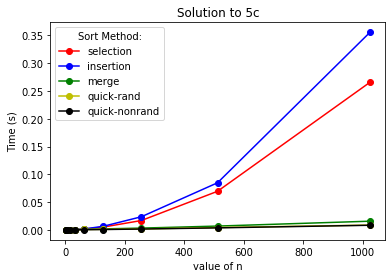

In [16]:
# 5c)
# A has a random order of integers from 0 to 100 inclusive.
"""
Both quicksorts (random and nonrandom) win, which makes sense because the array is pre-randomized in this
case (so random quicksort simply reshuffles; should not change runtime). In this case, both quicksorts are
operating at this best-case runtime, nlog(n).
"""

def doubling_test_c3(n, n_max):
    
    select_data = []
    insert_data = []
    merge_data = []
    quick_r_data = []
    quick_nr_data = []
    
    while n <= n_max: 
        select_data.append((n, get_time(case3array(n),selection_sort)))
        insert_data.append((n, get_time(case3array(n),insertion_sort)))
        merge_data.append((n, get_time(case3array(n),merge_sort)))
        quick_r_data.append((n, get_time(case3array(n),quick_sort_helper_rand)))
        quick_nr_data.append((n, get_time(case3array(n),quick_sort_helper_nonrand)))
        n *= 2
        
    select_np = np.array(select_data)
    insert_np = np.array(insert_data)
    merge_np = np.array(merge_data)
    quick_r_np = np.array(quick_r_data)
    quick_nr_np = np.array(quick_nr_data)
    
    return (select_np, insert_np, merge_np, quick_r_np, quick_nr_np)

c3_ret = doubling_test_c3(2, 1024)
select_c3, insert_c3, merge_c3, quick_r_c3, quick_nr_c3 = \
c3_ret[0],c3_ret[1], c3_ret[2], c3_ret[3], c3_ret[4]

plt.figure()
plt.title("Solution to 5c")
plt.xlabel("value of n")
plt.ylabel("Time (s)")

plt.plot(select_c3[:,0], select_c3[:,1], marker='o', color='r')
plt.plot(insert_c3[:,0], insert_c3[:,1], marker='o', color='b')
plt.plot(merge_c3[:,0], merge_c3[:,1], marker='o', color='g')
plt.plot(quick_r_c3[:,0], quick_r_c3[:,1], marker='o', color='y')
plt.plot(quick_nr_c3[:,0], quick_nr_c3[:,1], marker='o', color='k')

plt.legend(["selection","insertion","merge","quick-rand","quick-nonrand"], \
           loc='best', title = "Sort Method:", fancybox=True)

plt.show();

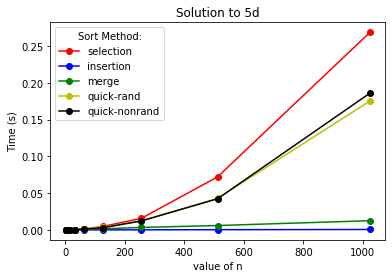

In [17]:
# 5d)
# A is made of entirely identical entries (all 1s).
"""
As in 5a, insertion sort is the fastest because there is no actual sorting to be done. When the array is pre-sorted
as it is here, the fastest sort method will perform the least unecessary steps (i.e., insertion sort).
"""

def doubling_test_c4(n, n_max):
    
    select_data = []
    insert_data = []
    merge_data = []
    quick_r_data = []
    quick_nr_data = []
    
    while n <= n_max: 
        select_data.append((n, get_time(case4array(n),selection_sort)))
        insert_data.append((n, get_time(case4array(n),insertion_sort)))
        merge_data.append((n, get_time(case4array(n),merge_sort)))
        quick_r_data.append((n, get_time(case4array(n),quick_sort_helper_rand)))
        quick_nr_data.append((n, get_time(case4array(n),quick_sort_helper_nonrand)))
        n *= 2
        
    select_np = np.array(select_data)
    insert_np = np.array(insert_data)
    merge_np = np.array(merge_data)
    quick_r_np = np.array(quick_r_data)
    quick_nr_np = np.array(quick_nr_data)
    
    return (select_np, insert_np, merge_np, quick_r_np, quick_nr_np)

c4_ret = doubling_test_c4(2, 1024)
select_c4, insert_c4, merge_c4, quick_r_c4, quick_nr_c4 = \
c4_ret[0],c4_ret[1], c4_ret[2], c4_ret[3], c4_ret[4]

plt.figure()
plt.title("Solution to 5d")
plt.xlabel("value of n")
plt.ylabel("Time (s)")

plt.plot(select_c4[:,0], select_c4[:,1], marker='o', color='r')
plt.plot(insert_c4[:,0], insert_c4[:,1], marker='o', color='b')
plt.plot(merge_c4[:,0], merge_c4[:,1], marker='o', color='g')
plt.plot(quick_r_c4[:,0], quick_r_c4[:,1], marker='o', color='y')
plt.plot(quick_nr_c4[:,0], quick_nr_c4[:,1], marker='o', color='k')

plt.legend(["selection","insertion","merge","quick-rand","quick-nonrand"], \
           loc='best', title = "Sort Method:", fancybox=True)

plt.show();

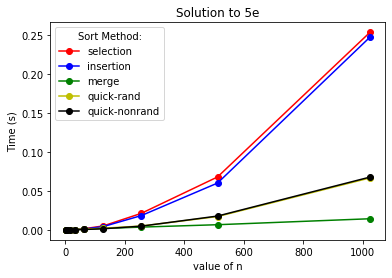

In [18]:
# 5e)
# A is composed of 3 distinct entries (in random order) i.e. 0, 1 and 2.
"""
Merge sort wins here, which makes sense because with only 3 unique entries, the algorithim will be functioning at
its base-case speed (i.e., nlog(n))
"""

def doubling_test_c5(n, n_max):
    
    select_data = []
    insert_data = []
    merge_data = []
    quick_r_data = []
    quick_nr_data = []
    
    while n <= n_max: 
        select_data.append((n, get_time(case5array(n),selection_sort)))
        insert_data.append((n, get_time(case5array(n),insertion_sort)))
        merge_data.append((n, get_time(case5array(n),merge_sort)))
        quick_r_data.append((n, get_time(case5array(n),quick_sort_helper_rand)))
        quick_nr_data.append((n, get_time(case5array(n),quick_sort_helper_nonrand)))
        n *= 2
        
    select_np = np.array(select_data)
    insert_np = np.array(insert_data)
    merge_np = np.array(merge_data)
    quick_r_np = np.array(quick_r_data)
    quick_nr_np = np.array(quick_nr_data)
    
    return (select_np, insert_np, merge_np, quick_r_np, quick_nr_np)

c5_ret = doubling_test_c5(2, 1024)
select_c5, insert_c5, merge_c5, quick_r_c5, quick_nr_c5 = \
c5_ret[0],c5_ret[1], c5_ret[2], c5_ret[3], c5_ret[4]

plt.figure()
plt.title("Solution to 5e")
plt.xlabel("value of n")
plt.ylabel("Time (s)")

plt.plot(select_c5[:,0], select_c5[:,1], marker='o', color='r')
plt.plot(insert_c5[:,0], insert_c5[:,1], marker='o', color='b')
plt.plot(merge_c5[:,0], merge_c5[:,1], marker='o', color='g')
plt.plot(quick_r_c5[:,0], quick_r_c5[:,1], marker='o', color='y')
plt.plot(quick_nr_c5[:,0], quick_nr_c5[:,1], marker='o', color='k')

plt.legend(["selection","insertion","merge","quick-rand","quick-nonrand"], \
           loc='best', title = "Sort Method:", fancybox=True)

plt.show();

In [ ]:
# 6a)
"""
S(0) = 6  			for n = 0
S(n) = S(n-1) + 2 	for n = 1, 2, 3, ... 

S(1) = S(0) + 2 -> S(1) = 6 + 2 = 8
S(2) = S(1) + 2 -> S(2) = 8 + 2 = 10
S(3) = S(2) + 2 -> S(3) = 10 + 2 = 12
-------------------------------------
Eq.1) S(n) = S(n-1) + 2
Eq.2) S(n-1) = S(n-2) + 2
Eq.3) S(n-2) = S(n-3) + 2

In Eq.1, substitute "S(n-1)" with "S(n-2) + 2" from Eq.2:
Re.1) S(n) = (S(n-2) + 2) + 2

In Re.1, substitute "S(n-2)" with "S(n-3) + 2" from Eq.3:
Re.2) (S(n-3) + 2 + 2) + 2

Ergo, we can rewrite S(n) as:
S(n) = S(n-x) + 2x

Since we know that S(0) = 6, n-x must be equal to 0. This 
equation (n-x = 0) can be rewritten in the form x = n:
S(n) = S(0) + 2n

So, the closed form expression is:
S(n) = 6 + 2n
"""

In [ ]:
# 6b)
"""
T(1) = 2 			for n = 1
T(n) = 2T(n-1) + 4 	for n = 2, 3, 4, …

T(1) = 2
T(2) = 2T(1) + 4 -> T(2) = 4 + 4 = 8
T(3) = 2T(2) + 4 -> T(2) = 16 + 4 = 20
T(4) = 2T(3) + 4 -> T(2) = 40 + 4 = 44
-------------------------------------
Eq.1) T(n) = 2T(n-1) + 4
Eq.2) T(n-1) = 2T(n-2) + 4
Eq.3) T(n-2) = 2T(n-3) + 4
    
In Eq.1, substitute "T(n-1)" with "2T(n-2) + 4" from Eq.2:
Re.1) T(n) = 2(2T(n-2) + 4) + 4 -> 
      T(n) = 4*T(n-2) + 8 + 4
      
In Re.1, substitute "T(n-2)" with "2T(n-3) + 4" from Eq.3:
Re.2) T(n) = 4*(2T(n-3) + 4) + 8 + 4 -> 
      T(n) = 8*T(n-3) + 16) + 8 + 4 

Ergo, we can rewrite T(n) as:
T(n) = (2^x)*(T(n-x))+((2^x)-1)*4

Since we know T(1) = 2, n-x must be equal to 1. This
equation (n-x = 1) can be rewritten in the form x = n-1:
T(n) = (2^(n-1))*T(1)+((2^(n-1))-1)*4

So, the closed form expression is:
T(n) = 3*(2^n) - 4
"""

In [ ]:
# 6c) -- (BONUS)
"""
N/A
"""

In [ ]:
# 7)
"""
T(1) = 0 			        for n = 1, 
T(n) = 2T(n/2) + (n-1)		for n = 2, 4, 8 

T(1) = 0
T(2) = 2T(2/2) + (2-1) -> T(2) = 0 + 1 = 1
T(4) = 2T(4/2) + (4-1) -> T(4) = 2 + 3 = 5
-------------------------------------
Eq.1) T(n) = 2T(n/2) + (n-1)
Eq.2) T(n/2) = 2T(n/4) + ((n/2)-1)
Eq.3) T(n/4) = 2T(n/8) + ((n/4)-1)

In Eq.1, substitute "T(n/2)" with "2T(n/4) + ((n/2)-1)" from Eq.2:
Re.1) T(n) = 2(2T(n/4) + ((n/2)-1)) + (n-1)

In Re.1, substitute "T(n/4)" with "2T(n/8) + ((n/4)-1)" from Eq.3:
Re.2) T(n) = 2(2(2T(n/8) + ((n/4)-1)) + ((n/2)-1)) + (n-1)

Simplifying, we get:
T(n) = 8T(n/8) + (n-4) + (n-2) + (n-1) ->
T(n) = 8T(n/8) + 3n - 7

Ergo, we can rewrite T(n) as:
T(n) = (2^x)(T(n/2^x)) + (x)(n) - ((2^x)-1)

Since we know that T(1) = 0, n/(x^2) must be equal to 1.
This equation (n/(x^2) = 1) can be rewritten in the form
x = log2(n):
T(n) = (2^log2(n))(T(1)) + log2(n)(n) - ((2^log2(n))-1)

So, the closed form expression is:
T(n) = nlog2(n) - n + 1
"""

In [ ]:
# 8a)
"""
A = [13, 19, 9, 5, 9, 8, 11, 9, 6]
partition(A, lo = 0, hi = len(A)-1)

If 13 is used as the pivot when the function "partition" is called,
the first swap to occur will be between the 19 and 6 at indices 
A[1] and A[8], respectively.

Resultant list: [13, 6, 9, 5, 9, 8, 11, 9, 19]

Then, 13 (pivot) and 9, at indices A[0] and A[7], respectively,
exchange places.

Resultant list: [9, 6, 9, 5, 9, 8, 11, 13, 19]

This list is now ready to be passed to a quicksort function.
"""

In [24]:
# 8b)
def quicksort_3way(A, lo, hi):
    if hi <= lo:
        return A
    lt, i, gt = lo, lo + 1, hi
    v = A[lo]
    while i <= gt:
        if A[i] < v:
            A[lt], A[i] = A[i], A[lt]
            i += 1; lt += 1
        elif A[i] > v:
            A[i], A[gt] = A[gt], A[i]
            gt -= 1
        else:
            i += 1
    A = quicksort_3way(A, lo, lt - 1)
    A = quicksort_3way(A, gt + 1, hi)
    
    return A

In [25]:
# 8c)
A = [2, 3, 1, 2, 2, 2, 3, 3]

# In quicksort_3way's return statement, I added the variable i 
def quicksort_3way(A, lo, hi):
    if hi <= lo:
        return A
    lt, i, gt = lo, lo + 1, hi
    v = A[lo]
    while i <= gt:
        if A[i] < v:
            A[lt], A[i] = A[i], A[lt]
            i += 1; lt += 1
        elif A[i] > v:
            A[i], A[gt] = A[gt], A[i]
            gt -= 1
        else:
            i += 1
    A = quicksort_3way(A, lo, lt - 1)
    A = quicksort_3way(A, gt + 1, hi)
    
    return A,i

print(quicksort_3way(A,0,len(A) - 1))

# "Value i terminates on: 5

(([1, 2, 2, 2, 2, 3, 3, 3], 8), 5)


In [26]:
# 9a)
A = [2, 3, 1, 2, 2, 2, 3, 3]

def FunnySort(A, i,j): 
    if A[i] > A[j]:
        A[i],A[j] = A[j],A[i]
    if (i + 1)>= j:
        return A
    k = int((j-i+1)/3) # the "int" function acts as floor
    A = FunnySort(A, i, j-k) 
    A = FunnySort(A, i+k, j) 
    A = FunnySort(A, i, j-k)
    return A

print(FunnySort(A, 0,len(A)-1))

"""
When we implement FunnySort in Python, we can see that it does in fact correctly sort arrays. Looking at the
algorithm, we can see that it first sorts the first 2/3rds of the given array. Then, it sorts the last 2/3rds
of the given array. Then, it sorts the first 2/3rds AGAIN. At this point, the array has been correctly sorted.
"""

[1, 2, 2, 2, 2, 3, 3, 3]


'\nWhen we implement FunnySort in Python, we can see that it does in fact correctly sort arrays. Looking at the\nalgorithm, we can see that it first sorts the first 2/3rds of the given array. Then, it sorts the last 2/3rds\nof the given array. Then, it sorts the first 2/3rds AGAIN. At this point, the array has been correctly sorted.\n'

In [ ]:
# 9b
"""
In each call to the function, 3 distinct sorting steps must occur. 
In each sorting step, 2/3rds of the array are sorted (first 2/3rds, 
last 2/3rds, & first 2/3rds, respectively). From this, we can guess
that the recurrence will take the form: T(n) = 3*T(2n/3)
"""

In [ ]:
# 9c
"""
Intuitively, the worst case running time of FunnySort would be worse than than
that of MergeSort; it is inherently a more inefficient function.
"""

In [ ]:
# 9d) -- (BONUS)
"""
N/A
"""